## Linked list
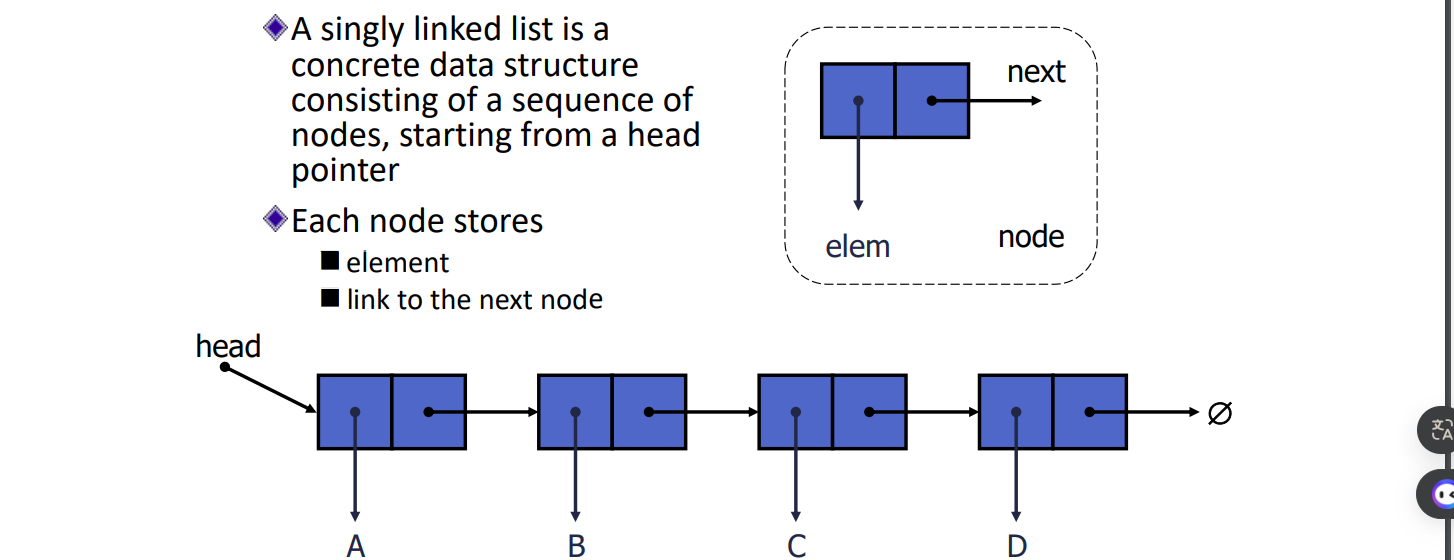
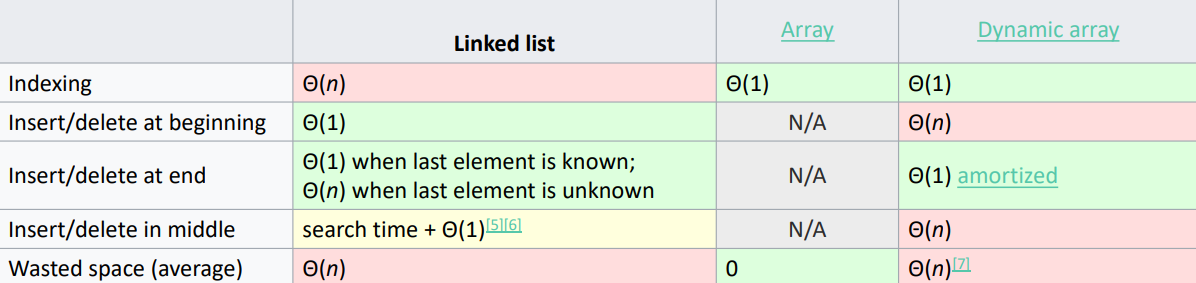

In [1]:
class LList:
    ## Start: Nested Node class, not visible from outside ----------------------
    class _Node:
        __slots__ = '_element', '_next'    # Optional: assign memory space for the member variables, faster!

        def __init__(self):
            self._element = None
            self._next = None

        def __init__(self, element, nxt):
            self._element = element
            self._next = nxt
    ## End: Nested Node class ----------------------

    __slots__ = '_head', '_tail', '_size'
    
    def __init__(self):
        self._head = None
        self._tail = None
        self._size = 0
        
    def __len__(self):
        return self._size
    
    def __str__(self):
        obj = self._head
        ret_str = f'{len(self)}: ['
        while obj != None:
            ret_str += str(obj._element)
            obj = obj._next
            if obj != None:
                ret_str += ','
        
        ret_str += ']'
        return ret_str
    
    def __repr__(self):
        return self.__str__()
    
    def is_empty(self):
        return len(self) == 0
    
    def add_first(self, obj):
        new_node = self._Node(obj, self._head)
        self._head = new_node
        self._size += 1
        
        if self._size == 1:
            self._tail = self._head
    
    # Add element at the tail of the list
    def add_last(self, obj):
        new_node = self._Node(obj, None)
        
        if len(self) == 0:
            self._head = new_node
            self._tail = new_node
        else:
            self._tail._next = new_node
            self._tail = new_node

        self._size += 1

    # Add an element at the given position
    def add(self, pos, obj):        
        # Three cases: insert at the head, or insert at the tail, or insert at the middle of the list.
        if pos == 0:
            self.add_first(obj)
        elif pos == len(self):
            self.add_last(obj)
        else:
            prev = None
            current = self._head
            for i in range(0, pos):     # 목표 위치까지 이동
                prev = current
                current = current._next
                
                if current == None:
                    raise IndexError
            
            new_node = self._Node(obj, current) # 목표 위치에 새 노드 삽입
            prev._next = new_node
            self._size += 1
            
    def get(self, pos):
        current = self._head
        for i in range(0, pos):
            current = current._next
            if current == None:
                raise IndexError
        return current._element
    
    def removeAt(self, pos):
        # Three cases: remove at the head, or remove at the tail, or insert at the middle of the list.
        if pos < 0 or pos >= len(self):
            raise IndexError
            
        prev = self._head
        current = self._head

        for i in range(0, pos):
            prev = current
            current = current._next   # current 노드를 찾음

        if current == self._head:
            self._head = current._next
        if current == self._tail:
            self._tail = prev

        prev._next = current._next    # current 노드를 건너뛰어 연결
        self._size -= 1
        
    def remove(self, obj):
        prev = None
        current = self._head
        
        while current != None:
            if current._element == obj:
                if current == self._head:
                    self._head = current._next       # current가 head일 때
                if current == self._tail:
                    self._tail = prev                # current가 tail일 때
                if prev != None:
                    prev._next = current._next       # current가 중간에 있을 때(current 노드를 건너뛰어 연결)
                    
                self._size -= 1
                return
            
            prev = current
            current = current._next
        
        raise LookupError

In [6]:
lst = ['red', 'blue', 'green', 'yellow', 'white', 'black']
ll = LList()
for i in lst:
    ll.add_last(i)
    print(ll, '\nhead:',ll.get(0),'tail:',ll.get(len(ll)-1),'size:',len(ll))
for i in range(0, 5):
    ll.removeAt(0)
    print(ll, '\nhead:',ll.get(0),'tail:',ll.get(len(ll)-1),'size:',len(ll))

1: [red] 
head: red tail: red size: 1
2: [red,blue] 
head: red tail: blue size: 2
3: [red,blue,green] 
head: red tail: green size: 3
4: [red,blue,green,yellow] 
head: red tail: yellow size: 4
5: [red,blue,green,yellow,white] 
head: red tail: white size: 5
6: [red,blue,green,yellow,white,black] 
head: red tail: black size: 6
5: [blue,green,yellow,white,black] 
head: blue tail: black size: 5
4: [green,yellow,white,black] 
head: green tail: black size: 4
3: [yellow,white,black] 
head: yellow tail: black size: 3
2: [white,black] 
head: white tail: black size: 2
1: [black] 
head: black tail: black size: 1


## Tree
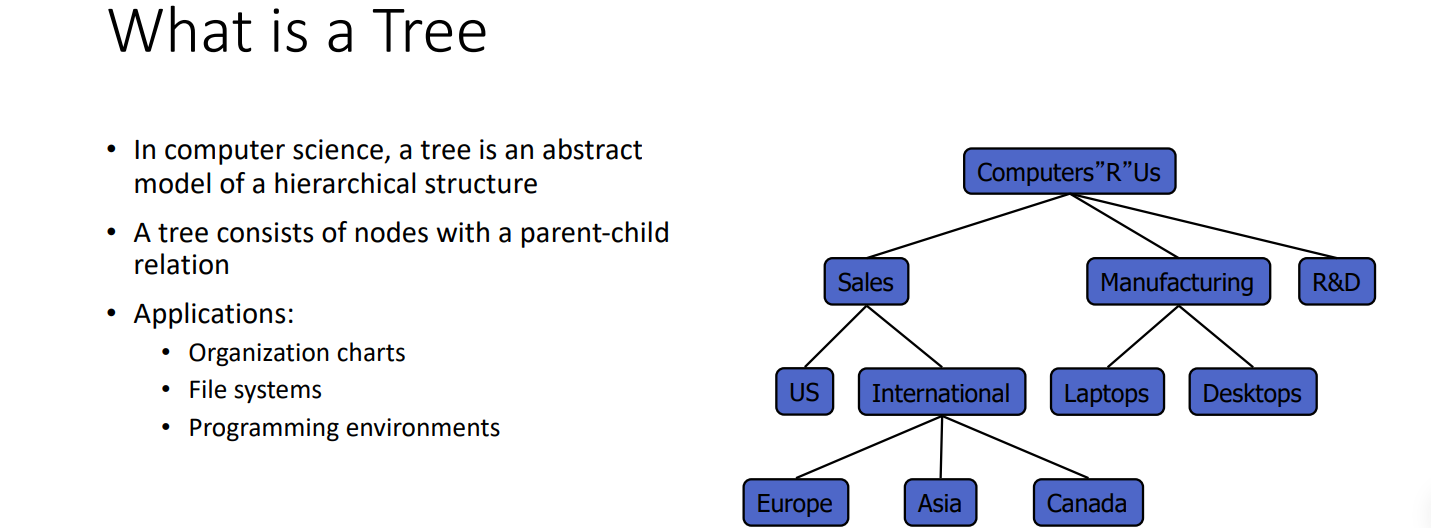

In [11]:
import collections

class Tree:
    """Abstract base class representing a tree structure."""

    #------------------------------- nested Position class -------------------------------
    class Position:
        """An abstraction representing the location of a single element within a tree.

        Note that two position instaces may represent the same inherent location in a tree.
        Therefore, users should always rely on syntax 'p == q' rather than 'p is q' when testing
        equivalence of positions.
        """

        def element(self):
            """Return the element stored at this Position."""
            raise NotImplementedError('must be implemented by subclass')
            
        def __eq__(self, other):
            """Return True if other Position represents the same location."""
            raise NotImplementedError('must be implemented by subclass')

        def __ne__(self, other):
            """Return True if other does not represent the same location."""
            return not (self == other)                        # opposite of __eq__

    # ---------- abstract methods that concrete subclass must support ----------
    def root(self):
        """Return Position representing the tree's root (or None if empty)."""
        raise NotImplementedError('must be implemented by subclass')

    def parent(self, p):
        """Return Position representing p's parent (or None if p is root)."""
        raise NotImplementedError('must be implemented by subclass')

    def num_children(self, p):
        """Return the number of children that Position p has."""
        raise NotImplementedError('must be implemented by subclass')

    def children(self, p):
        """Generate an iteration of Positions representing p's children."""
        raise NotImplementedError('must be implemented by subclass')

    def __len__(self):
        """Return the total number of elements in the tree."""
        raise NotImplementedError('must be implemented by subclass')

    # ---------- concrete methods implemented in this class ----------
    def is_root(self, p):
        """Return True if Position p represents the root of the tree."""
        return self.root() == p

    def is_leaf(self, p):
        """Return True if Position p does not have any children."""
        return self.num_children(p) == 0

    def is_empty(self):
        """Return True if the tree is empty."""
        return len(self) == 0

    def depth(self, p):
        """Return the number of levels separating Position p from the root."""
        if self.is_root(p):
            return 0
        else:
            return 1 + self.depth(self.parent(p))

    def _height1(self):                                 # works, but O(n^2) worst-case time
        """Return the height of the tree."""
        return max(self.depth(p) for p in self.positions() if self.is_leaf(p))
        # 모든 leaf의 depth를 계산하여 가장 큰 값을 반환

    def _height2(self, p):                                    # time is linear in size of subtree
        """Return the height of the subtree rooted at Position p."""
        if self.is_leaf(p):
            return 0
        else:
            return 1 + max(self._height2(c) for c in self.children(p))
        # 모든 subtree의 height를 계산하여 가장 큰 값을 반환

    def height(self, p=None):
        """Return the height of the subtree rooted at Position p.

        If p is None, return the height of the entire tree.
        """
        if p is None:
            p = self.root()
        return self._height2(p)                # start _height2 recursion

    def __iter__(self):
        """Generate an iteration of the tree's elements."""
        for p in self.positions():                                                # use same order as positions()
            yield p.element()                                                             # but yield each element

    def positions(self):
        """Generate an iteration of the tree's positions."""
        return self.preorder()                                                        # return entire preorder iteration

    def preorder(self):
        """Generate a preorder iteration of positions in the tree."""
        if not self.is_empty():
            for p in self._subtree_preorder(self.root()):    # start recursion
                print(p.element())
                yield p

    def _subtree_preorder(self, p):
        """Generate a preorder iteration of positions in subtree rooted at p."""
        yield p                                                                                     # visit p before its subtrees
        for c in self.children(p):                                                # for each child c
            for other in self._subtree_preorder(c):                 # do preorder of c's subtree
                yield other                                                                     # yielding each to our caller

    def postorder(self):
        """Generate a postorder iteration of positions in the tree."""
        if not self.is_empty():
            for p in self._subtree_postorder(self.root()):    # start recursion
                print(p.element())
                yield p

    def _subtree_postorder(self, p):
        """Generate a postorder iteration of positions in subtree rooted at p."""
        for c in self.children(p):                                                # for each child c
            for other in self._subtree_postorder(c):                # do postorder of c's subtree
                yield other                                                                     # yielding each to our caller
        yield p

In [12]:
class BinaryTree(Tree):
    """Abstract base class representing a binary tree structure."""

    # --------------------- additional abstract methods ---------------------
    def left(self, p):
        """Return a Position representing p's left child.

        Return None if p does not have a left child.
        """
        raise NotImplementedError('must be implemented by subclass')

    def right(self, p):
        """Return a Position representing p's right child.

        Return None if p does not have a right child.
        """
        raise NotImplementedError('must be implemented by subclass')

    # ---------- concrete methods implemented in this class ----------
    def sibling(self, p):
        """Return a Position representing p's sibling (or None if no sibling)."""
        parent = self.parent(p)
        if parent is None:                                        # p must be the root
            return None                                                 # root has no sibling
        else:
            if p == self.left(parent):
                return self.right(parent)                 # possibly None
            else:
                return self.left(parent)                    # possibly None

    def children(self, p):
        """Generate an iteration of Positions representing p's children."""
        if self.left(p) is not None:
            yield self.left(p)
        if self.right(p) is not None:
            yield self.right(p)

    def inorder(self):
        """Generate an inorder iteration of positions in the tree."""
        if not self.is_empty():
            for p in self._subtree_inorder(self.root()):
                print(p.element())
                yield p

    def _subtree_inorder(self, p):
        """Generate an inorder iteration of positions in subtree rooted at p."""
        if self.left(p) is not None:                    # if left child exists, traverse its subtree
            for other in self._subtree_inorder(self.left(p)):
                yield other
        yield p                                                             # visit p between its subtrees
        if self.right(p) is not None:                 # if right child exists, traverse its subtree
            for other in self._subtree_inorder(self.right(p)):
                yield other

    # override inherited version to make inorder the default
    def positions(self):
        """Generate an iteration of the tree's positions."""
        return self.inorder()   

In [13]:
class LinkedBinaryTree(BinaryTree):
    """Linked representation of a binary tree structure."""

    #-------------------------- nested _Node class --------------------------
    class _Node:
        """Lightweight, nonpublic class for storing a node."""
        __slots__ = '_element', '_parent', '_left', '_right' # streamline memory usage

        def __init__(self, element, parent=None, left=None, right=None):
            self._element = element
            self._parent = parent
            self._left = left
            self._right = right

    #-------------------------- nested Position class --------------------------
    class Position(BinaryTree.Position):
        """An abstraction representing the location of a single element."""

        def __init__(self, container, node):
            """Constructor should not be invoked by user."""
            self._container = container
            self._node = node

        def element(self):
            """Return the element stored at this Position."""
            return self._node._element

        def __eq__(self, other):
            """Return True if other is a Position representing the same location."""
            return type(other) is type(self) and other._node is self._node

    #------------------------------- utility methods -------------------------------
    def _validate(self, p):
        """Return associated node, if position is valid."""
        if not isinstance(p, self.Position):
            raise TypeError('p must be proper Position type')
        if p._container is not self:
            raise ValueError('p does not belong to this container')
        if p._node._parent is p._node:            # convention for deprecated nodes
            raise ValueError('p is no longer valid')
        return p._node

    def _make_position(self, node):
        """Return Position instance for given node (or None if no node)."""
        return self.Position(self, node) if node is not None else None

    #-------------------------- binary tree constructor --------------------------
    def __init__(self):
        """Create an initially empty binary tree."""
        self._root = None
        self._size = 0

    #-------------------------- public accessors --------------------------
    def __len__(self):
        """Return the total number of elements in the tree."""
        return self._size
    
    def root(self):
        """Return the root Position of the tree (or None if tree is empty)."""
        return self._make_position(self._root)

    def parent(self, p):
        """Return the Position of p's parent (or None if p is root)."""
        node = self._validate(p)
        return self._make_position(node._parent)

    def left(self, p):
        """Return the Position of p's left child (or None if no left child)."""
        node = self._validate(p)
        return self._make_position(node._left)

    def right(self, p):
        """Return the Position of p's right child (or None if no right child)."""
        node = self._validate(p)
        return self._make_position(node._right)

    def num_children(self, p):
        """Return the number of children of Position p."""
        node = self._validate(p)
        count = 0
        if node._left is not None:         # left child exists
            count += 1
        if node._right is not None:        # right child exists
            count += 1
        return count

    #-------------------------- nonpublic mutators --------------------------
    def _add_root(self, e):
        """Place element e at the root of an empty tree and return new Position.

        Raise ValueError if tree nonempty.
        """
        if self._root is not None:
            raise ValueError('Root exists')
        self._size = 1
        self._root = self._Node(e)
        return self._make_position(self._root)

    def _add_left(self, p, e):
        """Create a new left child for Position p, storing element e.

        Return the Position of new node.
        Raise ValueError if Position p is invalid or p already has a left child.
        """
        node = self._validate(p)
        if node._left is not None:
            raise ValueError('Left child exists')
        self._size += 1
        node._left = self._Node(e, node)                                    # node is its parent
        return self._make_position(node._left)

    def _add_right(self, p, e):
        """Create a new right child for Position p, storing element e.

        Return the Position of new node.
        Raise ValueError if Position p is invalid or p already has a right child.
        """
        node = self._validate(p)
        if node._right is not None:
            raise ValueError('Right child exists')
        self._size += 1
        node._right = self._Node(e, node)                                 # node is its parent
        return self._make_position(node._right)

    def _replace(self, p, e):
        """Replace the element at position p with e, and return old element."""
        node = self._validate(p)
        old = node._element
        node._element = e
        return old

    def _delete(self, p):
        """Delete the node at Position p, and replace it with its child, if any.

        Return the element that had been stored at Position p.
        Raise ValueError if Position p is invalid or p has two children.
        """
        node = self._validate(p)
        if self.num_children(p) == 2:
            raise ValueError('Position has two children')
        child = node._left if node._left else node._right    # might be None
        if child is not None:
            child._parent = node._parent     # child's grandparent becomes parent
        if node is self._root:
            self._root = child                         # child becomes root
        else:
            parent = node._parent
            if node is parent._left:
                parent._left = child
            else:
                parent._right = child
        self._size -= 1
        node._parent = node                            # convention for deprecated node
        return node._element
    
    def _attach(self, p, t1, t2): # p 위치에 t1, t2를 붙이는 함수
        """Attach trees t1 and t2, respectively, as the left and right subtrees of the external Position p.

        As a side effect, set t1 and t2 to empty.
        Raise TypeError if trees t1 and t2 do not match type of this tree.
        Raise ValueError if Position p is invalid or not external.
        """
        node = self._validate(p)
        if not self.is_leaf(p):
            raise ValueError('position must be leaf')
        if not type(self) is type(t1) is type(t2):        # all 3 trees must be same type
            raise TypeError('Tree types must match')
        self._size += len(t1) + len(t2)
        if not t1.is_empty():                 # attached t1 as left subtree of node
            t1._root._parent = node
            node._left = t1._root
            t1._root = None                         # set t1 instance to empty
            t1._size = 0
        if not t2.is_empty():                 # attached t2 as right subtree of node
            t2._root._parent = node
            node._right = t2._root
            t2._root = None                         # set t2 instance to empty
            t2._size = 0

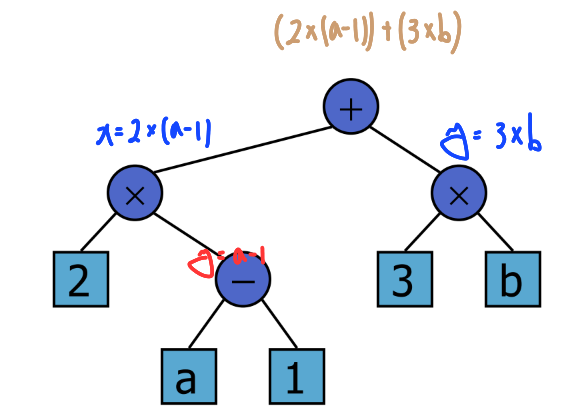

In [16]:
lbt = LinkedBinaryTree()
lbt._add_root('+')
lbt._add_left(lbt.root(), '*')
lbt._add_right(lbt.root(), '*')
lbt._add_left(lbt.left(lbt.root()), '2')
lbt._add_right(lbt.left(lbt.root()), '-')
lbt._add_left(lbt.right(lbt.root()), '3')
lbt._add_right(lbt.right(lbt.root()), 'b')
lbt._add_left(lbt.right(lbt.left(lbt.root())), 'a')
lbt._add_right(lbt.right(lbt.left(lbt.root())), '1')

In [17]:
print('Preorder: ' + ' '.join([p.element() for p in lbt.preorder()]))
print('Inorder: ' + ' '.join([p.element() for p in lbt.inorder()]))
print('Postorder: ' + ' '.join([p.element() for p in lbt.postorder()]))

+
*
2
-
a
1
*
3
b
Preorder: + * 2 - a 1 * 3 b
2
*
a
-
1
+
3
*
b
Inorder: 2 * a - 1 + 3 * b
2
a
1
-
*
3
b
*
+
Postorder: 2 a 1 - * 3 b * +
